# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call

# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19098562,
            "id": 1,
            "last_updated": 1658332430,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 461369708298,
                    "percent_change_1h": 0.520397032218376,
                    "percent_change_24h": 5.34121241537444,
                    "percent_change_7d": 24.7957971890438,
                    "percentage_change_1h": 0.520397032218376,
                    "percentage_change_24h": 5.34121241537444,
                    "percentage_change_7d": 24.7957971890438,
                    "price": 24149.0,
                    "volume_24h": 46406734070
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19098562,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))



{
    "data": {
        "1027": {
            "circulating_supply": 119754167,
            "id": 1027,
            "last_updated": 1658332463,
            "max_supply": 119754437,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 191191332169,
                    "percent_change_1h": -0.410271638971189,
                    "percent_change_24h": 3.55497302828589,
                    "percent_change_7d": 53.3402117907315,
                    "percentage_change_1h": -0.410271638971189,
                    "percentage_change_24h": 3.55497302828589,
                    "percentage_change_7d": 53.3402117907315,
                    "price": 1595.96,
                    "volume_24h": 22462010255
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119754167,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryp

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']


# Print the current price of BTC

print(F"The price of Bitcoin is ${btc_price}")

The price of Bitcoin is $24149.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

eth_price
# Print the current price of ETH
# YOUR CODE HERE
print(f"The price of Eth is ${eth_price}")


The price of Eth is $1595.96


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
btc_coins = 1.2
eth_coins = 5.3
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
# YOUR CODE HERE
print(f"The current value of bitcoin in US Dollars is ${btc_value: .2f}")


The current value of bitcoin in US Dollars is $ 28978.80


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
# YOUR CODE HERE
print(f"The current value of ethereum in US Dollars is ${eth_value: .2f}")


The current value of ethereum in US Dollars is $ 8458.59


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
print(f"The current balance of the current cryptocurrency wallet is ${total_crypto_wallet: .2f}")   


The current balance of the current cryptocurrency wallet is $ 37437.39


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")



str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
timeframe = "1Day"
start_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
portfolio_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
SPY = portfolio_prices_df[portfolio_prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = portfolio_prices_df[portfolio_prices_df['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE
portfolio_prices_df = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
portfolio_prices_df.head()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-07-15 04:00:00+00:00  382.62  385.25  380.54  385.13  79318992   

                                                      AGG                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2022-07-15 04:00:00+00:00      488124  383.334989  101.94  102.35  101.9   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price =  float(portfolio_prices_df["AGG"]["close"])

# Print the AGG closing price
# YOUR CODE HERE
agg_close_price


102.25

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_prices_df["SPY"]["close"])


# Print the SPY closing price
# YOUR CODE HERE
spy_close_price


385.13

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
print(f"The current value of the bond portfolio is ${agg_value: .2f}")


The current value of the bond portfolio is $ 20450.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${spy_value: .2f}")


The current value of the stock portfolio is $ 42364.30


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds: .2f}")


The current balance of the stock and bond portion of the portfolio is $ 62814.30


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The current balance of the entire savings portfolio is ${ total_portfolio: .2f}") 

The current balance of the entire savings portfolio is $ 100251.69


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE
savings_data
    

[37437.388, 62814.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(data=savings_data)

# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df

,0
0,37437.388
1,62814.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

,Amount
Stocks and Bonds,62814.300
Crypto,37437.388


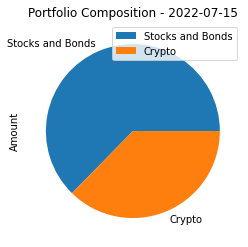

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
pie_values_df = pd.DataFrame(
    {'Amount':[total_stocks_bonds, total_crypto_wallet]},
    index=['Stocks and Bonds', 'Crypto']
)
pie_values_df.plot.pie(y='Amount', title='Portfolio Composition - 2022-07-15')
pie_values_df

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income
emergency_fund_value


36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
if total_portfolio > emergency_fund_value:
    print(f"Congratuations, you have enough money in this fund")
# YOUR CODE HERE
if total_portfolio == emergency_fund_value:
    print(f"Congratulations, you reached this important financial goal")
# YOUR CODE HERE
if total_portfolio < emergency_fund_value:
    print(f"You are ${emergency_fund_value - total_portfolio: .2f} away from your goal")



Congratuations, you have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE
start_date = pd.Timestamp("2019-07-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])


# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
display(prices_df.head())
display(prices_df.tail())

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  110.87  110.960  110.85  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-07-15 04:00:00+00:00       10885  110.925638  301.12  301.13  300.19   
2019-07-16 04:00:00+00:00       12676  110.743438  300.64  300.88  299.44   
2019-07-17 04:00:00+00:00       11771  111.066605  299.77  299.93  297.74   
2019-07-18 04:00:00+00:00       17331  111.220550  297.18  299.25  296.70   
2019-07-19 04:00:00+00:00        9948  111.225017  300.01  300.07  296.96   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-07-15 04:00:00+00:00  300.75  33992129      149900  300.605019  
2019-07-16 04:00:00+00:00  299.71  40807546      183816  300.108039  
2019-07-17 04:00:00+00:00  297.74  44343835      200151  298.543544  
2019-07-18 04:00:00+00:00  298.83  53567032      236661  298.067797  
2019-07-19 04:00:00+00:00  297.17  76794138      260715  298.617649

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2022-07-11 04:00:00+00:00  101.67  101.92  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.19  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.24  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.98  101.3300  101.85  6224496   
2022-07-15 04:00:00+00:00  101.94  102.35  101.9000  102.25  8440151   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-07-11 04:00:00+00:00       17084  101.720884  385.91  386.8700  383.500   
2022-07-12 04:00:00+00:00       21057  102.039440  383.66  386.1600  378.990   
2022-07-13 04:00:00+00:00       26716  101.977478  375.09  381.9200  374.658   
2022-07-14 04:00:00+00:00       24722  101.747120  373.99  379.0498  371.040   
2022-07-15 04:00:00+00:00       27300  102.214854  382.62  385.2500  380.540   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-11 04:00:00+00:00  384.23  58100363      473423  384.871994  
2022-07-12 04:00:00+00:00  380.83  62027220      512244  382.617620  
2022-07-13 04:00:00+00:00  378.83  83575452      671953  378.819688  
2022-07-14 04:00:00+00:00  377.91  89349688      637416  375.589384  
2022-07-15 04:00:00+00:00  385.13  79318992      488124  383.334989

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_split_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)
# Review the simulation input data
# YOUR CODE HERE
MC_split_weight.portfolio_data.head()


AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  110.87  110.960  110.85  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00       10885  110.925638          NaN  301.12   
2019-07-16 04:00:00+00:00       12676  110.743438    -0.001082  300.64   
2019-07-17 04:00:00+00:00       11771  111.066605     0.002617  299.77   
2019-07-18 04:00:00+00:00       17331  111.220550     0.001620  297.18   
2019-07-19 04:00:00+00:00        9948  111.225017    -0.001168  300.01   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  301.13  300.19  300.75  33992129      149900   
2019-07-16 04:00:00+00:00  300.88  299.44  299.71  40807546      183816   
2019-07-17 04:00:00+00:00  299.93  297.74  297.74  44343835      200151   
2019-07-18 04:00:00+00:00  299.25  296.70  298.83  53567032      236661   
2019-07-19 04:00:00+00:00  300.07  296.96  297.17  76794138      260715   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  300.605019          NaN  
2019-07-16 04:00:00+00:00  300.108039    -0.003458  
2019-07-17 04:00:00+00:00  298.543544    -0.006573  
2019-07-18 04:00:00+00:00  298.067797     0.003661  
2019-07-19 04:00:00+00:00  298.617649    -0.005555

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_split_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\jmstr\OneDrive\Desktop\Fintech_Workspace\Class_Activities\Module_5\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002500,1.008516,1.020174,1.003804,0.997914,0.997449,1.004419,0.987947,1.003123,1.005944,...,1.008371,1.007912,1.001349,1.002690,1.006385,0.992373,0.991793,0.995728,0.997168,1.012927
2,1.012893,0.987386,1.020498,0.991951,0.991302,0.993987,1.006539,0.990390,1.001682,1.003606,...,1.013618,1.003465,0.998999,1.008929,1.014730,0.982669,0.988781,0.989786,1.005962,1.014357
3,1.009972,0.975352,1.033222,0.994774,0.993994,0.987925,1.006620,0.983960,1.014063,1.001671,...,1.015704,0.985598,0.998627,1.009005,1.024635,0.975662,0.992633,0.996541,1.010921,0.996811
4,1.018716,0.987656,1.023188,0.999491,0.988075,0.990640,1.021389,0.992060,1.015792,1.016512,...,1.005429,0.977823,1.003433,1.001884,1.037521,0.979268,0.991210,0.998174,1.010112,0.992240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.504320,7.820674,5.927627,3.881631,1.202932,12.810801,1.439227,4.301223,13.420185,1.393926,...,4.333660,7.007772,4.675219,6.277449,3.218962,3.416473,0.585496,4.688393,2.098205,1.129138
7557,1.513968,7.868400,5.973629,3.948189,1.202545,12.866008,1.434988,4.231753,13.394554,1.415383,...,4.357726,7.035072,4.613613,6.247356,3.223471,3.455505,0.587920,4.746852,2.079450,1.119728
7558,1.507548,8.004904,5.999133,4.000570,1.181414,12.829972,1.431097,4.267130,13.426860,1.412168,...,4.310065,7.055137,4.656166,6.295071,3.203426,3.493961,0.587216,4.735392,2.073606,1.123697
7559,1.499989,8.045487,6.076024,4.020048,1.169257,12.717941,1.447092,4.285927,13.304013,1.447844,...,4.289114,7.051894,4.746742,6.241095,3.203960,3.512304,0.582489,4.760020,2.096521,1.139415


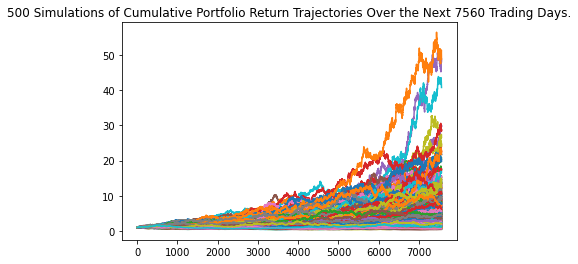

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
split_weight_line_plot = MC_split_weight.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

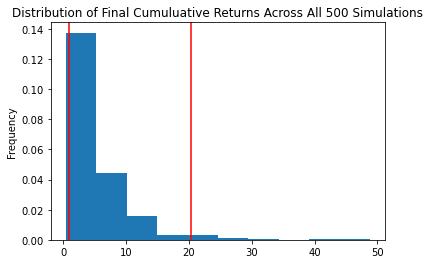

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
split_weight_distribution_plot = MC_split_weight.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
split_weight_table = MC_split_weight.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

print(split_weight_table)

count           500.000000
mean              5.389404
std               5.432789
min               0.405047
25%               2.292955
50%               3.795489
75%               6.411529
max              48.860325
95% CI Lower      0.869221
95% CI Upper     20.278267
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds



62814.3

In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(split_weight_table[8] * total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = round(split_weight_table[9] * total_stocks_bonds, 2)
# Print the result of your calculations
# YOUR CODE HERE
ci_lower_thirty_cumulative_return
ci_upper_thirty_cumulative_return

print(f"There is a 95% chance that an initial investment of $60,688.70 in the portfolio"
      f" with an split weight portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

There is a 95% chance that an initial investment of $60,688.70 in the portfolio with an split weight portfolio over the next 30 years will end within in the range of $54599.5 and $1273765.14.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_split_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Review the simulation input data
# YOUR CODE HERE
MC_split_weight.portfolio_data




AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-07-15 04:00:00+00:00  110.87  110.960  110.8500  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.6400  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.9100  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.0600  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.1400  111.17  3150774   
...                           ...      ...       ...     ...      ...   
2022-07-11 04:00:00+00:00  101.67  101.920  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.190  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.240  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.980  101.3300  101.85  6224496   
2022-07-15 04:00:00+00:00  101.94  102.350  101.9000  102.25  8440151   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00       10885  110.925638          NaN  301.12   
2019-07-16 04:00:00+00:00       12676  110.743438    -0.001082  300.64   
2019-07-17 04:00:00+00:00       11771  111.066605     0.002617  299.77   
2019-07-18 04:00:00+00:00       17331  111.220550     0.001620  297.18   
2019-07-19 04:00:00+00:00        9948  111.225017    -0.001168  300.01   
...                               ...         ...          ...     ...   
2022-07-11 04:00:00+00:00       17084  101.720884     0.004643  385.91   
2022-07-12 04:00:00+00:00       21057  102.039440     0.001377  383.66   
2022-07-13 04:00:00+00:00       26716  101.977478     0.003633  375.09   
2022-07-14 04:00:00+00:00       24722  101.747120    -0.003522  373.99   
2022-07-15 04:00:00+00:00       27300  102.214854     0.003927  382.62   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2019-07-15 04:00:00+00:00  301.1300  300.190  300.75  33992129      149900   
2019-07-16 04:00:00+00:00  300.8800  299.440  299.71  40807546      183816   
2019-07-17 04:00:00+00:00  299.9300  297.740  297.74  44343835      200151   
2019-07-18 04:00:00+00:00  299.2500  296.700  298.83  53567032      236661   
2019-07-19 04:00:00+00:00  300.0700  296.960  297.17  76794138      260715   
...                             ...      ...     ...       ...         ...   
2022-07-11 04:00:00+00:00  386.8700  383.500  384.23  58100363      473423   
2022-07-12 04:00:00+00:00  386.1600  378.990  380.83  62027220      512244   
2022-07-13 04:00:00+00:00  381.9200  374.658  378.83  83575452      671953   
2022-07-14 04:00:00+00:00  379.0498  371.040  377.91  89349688      637416   
2022-07-15 04:00:00+00:00  385.2500  380.540  385.13  79318992      488124   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  300.605019          NaN  
2019-07-16 04:00:00+00:00  300.108039    -0.003458  
2019-07-17 04:00:00+00:00  298.543544    -0.006573  
2019-07-18 04:00:00+00:00  298.067797     0.003661  
2019-07-19 04:00:00+00:00  298.617649    -0.005555  
...                               ...          ...  
2022-07-11 04:00:00+00:00  384.871994    -0.011424  
2022-07-12 04:00:00+00:00  382.617620    -0.008849  
2022-07-13 04:00:00+00:00  378.819688    -0.005252  
2022-07-14 04:00:00+00:00  375.589384    -0.002429  
2022-07-15 04:00:00+00:00  383.334989     0.019105  

[758 rows x 16 columns]

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_split_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\jmstr\OneDrive\Desktop\Fintech_Workspace\Class_Activities\Module_5\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006004,1.000254,1.022373,0.999418,0.993533,0.982871,0.983058,0.986870,1.001482,0.998264,...,1.005747,1.010522,0.992325,1.009884,1.001742,0.994543,1.015716,1.015992,0.997077,1.022086
2,1.030497,0.995870,1.032019,1.015361,1.006499,0.986719,0.981383,0.963650,1.000411,0.982140,...,1.008158,1.015825,0.994771,1.019234,0.985960,0.983693,1.010582,1.032130,0.992626,1.034815
3,1.037895,0.990902,1.016779,1.013486,0.993091,0.983228,0.976176,0.973839,1.001345,0.988430,...,1.003521,1.024066,0.967462,1.008520,0.983364,0.977762,1.015917,1.053931,0.985544,1.043311
4,1.040340,0.976841,1.017517,0.984986,1.019365,0.980471,0.991322,0.978774,0.998331,0.989649,...,0.993197,1.018755,0.959955,0.993681,0.961003,0.961795,1.022201,1.075208,0.987167,1.034565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.740922,3.226571,2.317836,3.024179,1.778960,1.755893,2.900146,7.093710,2.359098,2.025594,...,1.111968,1.756441,1.979616,2.437219,2.018016,3.016979,1.032056,5.276476,2.750420,1.288657
2517,0.734745,3.196196,2.321018,3.034949,1.809341,1.766135,2.879269,7.085762,2.343814,2.008616,...,1.127909,1.778586,1.998250,2.484562,2.009733,2.960124,1.031351,5.267690,2.733221,1.300709
2518,0.731512,3.185961,2.321899,3.031188,1.808220,1.765679,2.975165,6.973555,2.349765,1.975680,...,1.121528,1.780453,2.001445,2.440420,1.980549,2.910562,1.028060,5.192091,2.758679,1.308102
2519,0.732986,3.249511,2.254380,2.996384,1.814964,1.771209,3.007497,6.978473,2.341379,1.942239,...,1.096409,1.787607,1.990021,2.436154,1.981118,2.954524,1.007009,5.197801,2.768546,1.294770


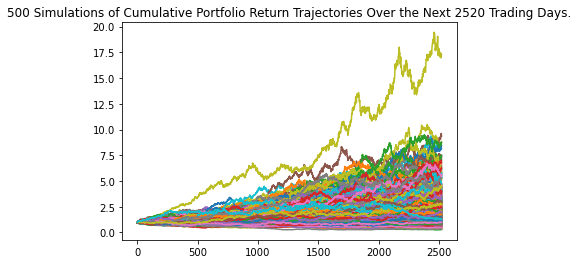

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
split_weight_line_plot = MC_split_weight.plot_simulation()


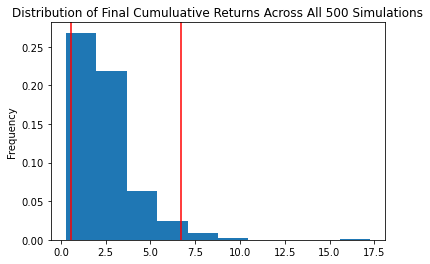

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
split_weight_distribution_plot = MC_split_weight.plot_distribution()


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

split_weight_table = MC_split_weight.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
print(split_weight_table)

count           500.000000
mean              2.465689
std               1.676928
min               0.273926
25%               1.379915
50%               2.062661
75%               3.119379
max              17.267142
95% CI Lower      0.563485
95% CI Upper      6.713807
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds


62814.3

In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(split_weight_table[8] * total_stocks_bonds, 2)
ci_upper_ten_cumulative_return = round(split_weight_table[9] * total_stocks_bonds, 2)
# Print the result of your calculations
# YOUR CODE HERE
ci_lower_ten_cumulative_return
ci_upper_ten_cumulative_return

print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
      f" with a split weight portfolio over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")

There is a 95% chance that an initial investment of $62814.3 in the portfolio with a split weight portfolio over the next 10 years will end within in the range of $35394.93 and $421723.06.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?